In [1]:
import os
os.chdir('../../..')
import numpy as np
from rdkit.Chem import MolFromSmarts, MolFromSmiles, MolFromInchi

import pickle
from molgrad.utils import DATA_PATH

RDKit WARNING: [12:59:49] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from molgrad.vis_baseline import molecule_importance_diff
from molgrad.utils import BASELINE_MODELS_PATH, EXAMPLE_PATH
from molgrad.baseline_utils import pred_baseline
from rdkit.Chem.rdmolops import Kekulize

Using backend: pytorch


In [3]:
from joblib import load

model = load(os.path.join(BASELINE_MODELS_PATH, "rf_herg.pt"))

/home/hawk31/miniconda3/envs/molgrad/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/hawk31/miniconda3/envs/molgrad/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### https://link.springer.com/chapter/10.1007/7355_2014_38

In [4]:
# Series one
mol = MolFromSmiles("CC(C(N)C(=O)N1CCC(F)C1)C1=CC=C(C=C1)C1=CC=C(F)C=C1")

[5.56540583]


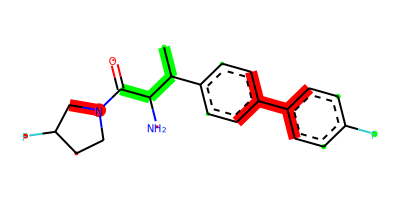

In [5]:
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.1022762]


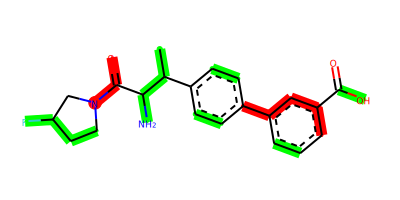

In [6]:
mol = MolFromSmiles("CC(C(N)C(=O)N1CCC(F)C1)C1=CC=C(C=C1)C1=CC=CC(=C1)C(O)=O")
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[4.792964]


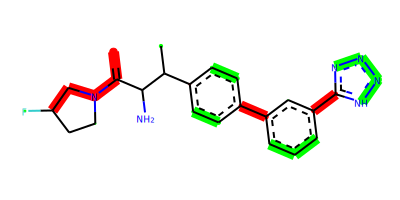

In [7]:
mol = MolFromSmiles("CC(C(N)C(=O)N1CCC(F)C1)C1=CC=C(C=C1)C1=CC=CC(=C1)C1=NN=NN1")
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.33892897]


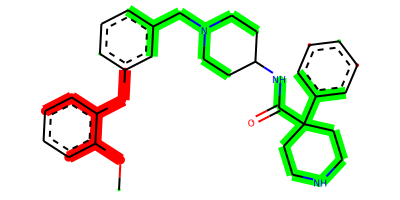

In [8]:
## Second series, bad
mol = MolFromSmiles("COC1=CC=CC=C1OC1=CC(CN2CCC(CC2)NC(=O)C2(CCNCC2)C2=CC=CC=C2)=CC=C1") #active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.34804229]


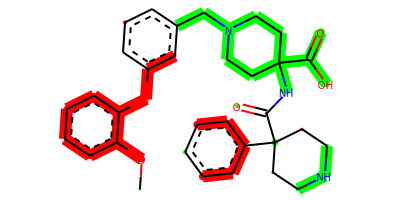

In [9]:
mol = MolFromSmiles("COC1=CC=CC=C1OC1=CC(CN2CCC(CC2)(NC(=O)C2(CCNCC2)C2=CC=CC=C2)C(O)=O)=CC=C1") # inactive
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[7.07240629]


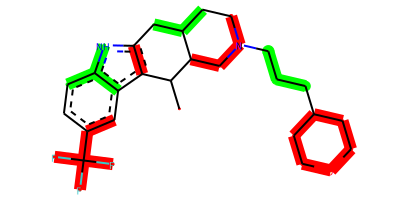

In [10]:
## Third series
mol = MolFromSmiles("C[C@@H]1[C@H]2CN(CCCC3CCOCC3)CC[C@@H]2CC2=C1C1=C(N2)C=CC(=C1)C(F)(F)F") #HERG ACTIVE
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[6.30024926]


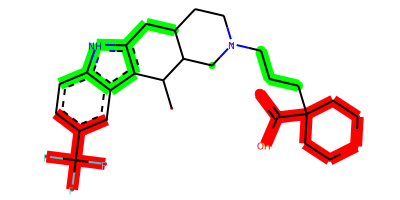

In [11]:
mol = MolFromSmiles("C[C@@H]1[C@H]2CN(CCCC3(CCOCC3)C(O)=O)CC[C@@H]2CC2=C1C1=C(N2)C=CC(=C1)C(F)(F)F") #HERG INACTIVE
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[6.19186514]


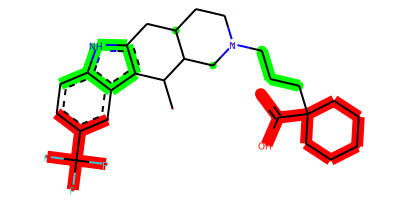

In [12]:
mol = MolFromSmiles("C[C@@H]1[C@H]2CN(CCCC3(CCCCC3)C(O)=O)CC[C@@H]2CC2=C1C1=C(N2)C=CC(=C1)C(F)(F)F") #HERG INACTIVE
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

### https://www.sciencedirect.com/science/article/pii/S0960894X06006615

[5.29675737]


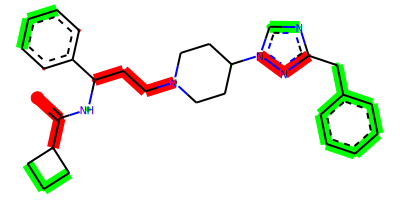

In [13]:
## first series
mol = MolFromSmiles("O=C(N[C@@H](CCN1CCC(CC1)N1C=NC(CC2=CC=CC=C2)=N1)C1=CC=CC=C1)C1CCC1") #HERG ACTIVE
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.12418243]


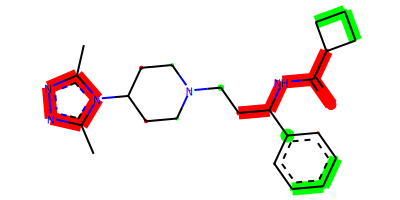

In [14]:
mol = mol = MolFromSmiles("CC1=NN=C(C)N1C1CCN(CC[C@H](NC(=O)C2CCC2)C2=CC=CC=C2)CC1") #HERG INACTIVE
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4593700/

[5.20863347]


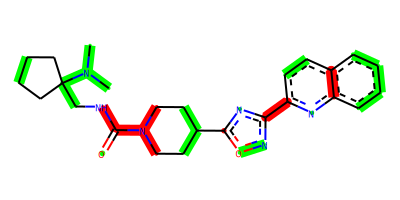

In [15]:
# first series
mol = MolFromSmiles('CN(C)C1(CNC(=O)N2CCC(CC2)C2=NC(=NO2)C2=NC3=CC=CC=C3C=C2)CCCC1') # 30um
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.19531634]


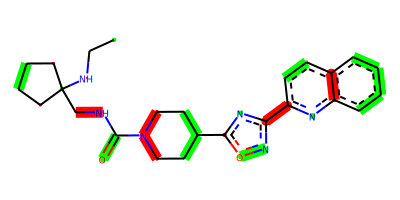

In [16]:
mol = MolFromSmiles("CCNC1(CNC(=O)N2CCC(CC2)C2=NC(=NO2)C2=NC3=CC=CC=C3C=C2)CCCC1") # 24um
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.24829094]


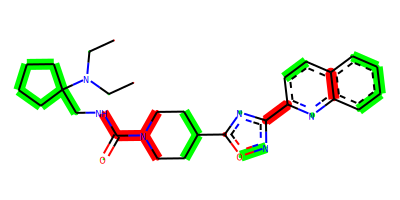

In [17]:
mol = MolFromSmiles("CCN(CC)C1(CNC(=O)N2CCC(CC2)C2=NC(=NO2)C2=NC3=CC=CC=C3C=C2)CCCC1") # 9.4um
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.06136344]


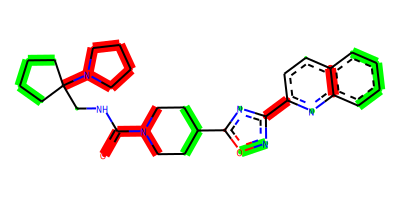

In [18]:
mol = MolFromSmiles('O=C(NCC1(CCCC1)N1CCCC1)N1CCC(CC1)C1=NC(=NO1)C1=NC2=CC=CC=C2C=C1') # 7.1um
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.16914002]


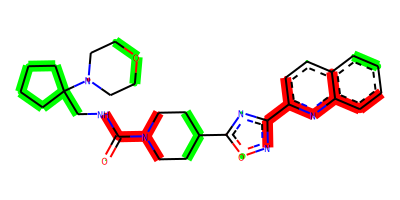

In [19]:
mol = MolFromSmiles("O=C(NCC1(CCCC1)N1CCOCC1)N1CCC(CC1)C1=NC(=NO1)C1=NC2=CC=CC=C2C=C1") # 10um
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.72356197]


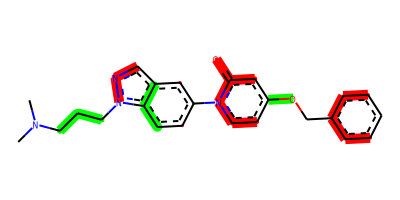

In [20]:
# second series
mol = MolFromSmiles("CN(C)CCCN1N=CC2=C1C=CC(=C2)N1C=CC(OCC2=CC=CC=C2)=CC1=O") # blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.53446113]


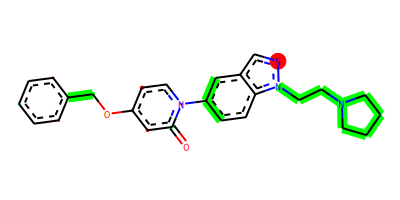

In [21]:
mol = MolFromSmiles("O=C1C=C(OCC2=CC=CC=C2)C=CN1C1=CC=C2N(CCN3CCCC3)N=CC2=C1") # blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.27340841]


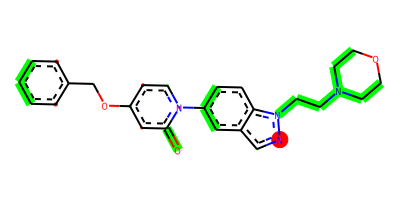

In [22]:
mol = MolFromSmiles("O=C1C=C(OCC2=CC=CC=C2)C=CN1C1=CC2=C(C=C1)N(CCN1CCOCC1)N=C2") # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.09022469]


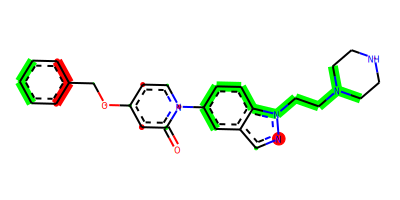

In [23]:
mol = MolFromSmiles("O=C1C=C(OCC2=CC=CC=C2)C=CN1C1=CC2=C(C=C1)N(CCN1CCNCC1)N=C2") # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.00523618]


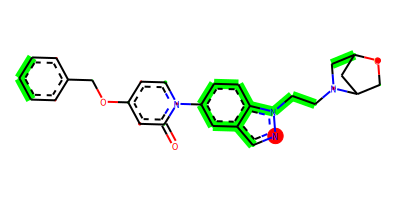

In [24]:
mol = MolFromSmiles("O=C1C=C(OCC2=CC=CC=C2)C=CN1C1=CC2=C(C=C1)N(CCN1CC3CC1CO3)N=C2") # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.27905818]


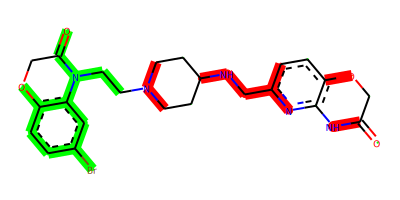

In [25]:
# third series
mol = MolFromSmiles("BrC1=CC=C2OCC(=O)N(CCN3CCC(CC3)NCC3=CC=C4OCC(=O)NC4=N3)C2=C1")  # blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.03405397]


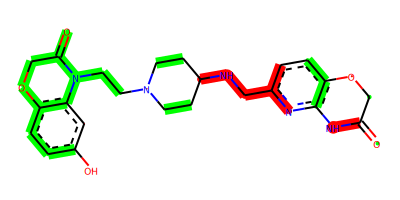

In [26]:
mol = MolFromSmiles("OC1=CC=C2OCC(=O)N(CCN3CCC(CC3)NCC3=CC=C4OCC(=O)NC4=N3)C2=C1") # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[4.97231981]


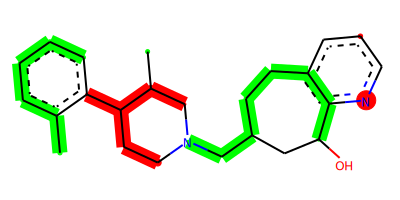

In [27]:
# fourth series
mol = MolFromSmiles("C[C@@H]1CN(C[C@@H]2CCC3=C(N=CC=C3)[C@@H](O)C2)CC[C@H]1C1=CC=CC=C1C") # blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[4.65525219]


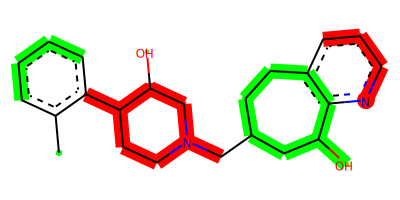

In [28]:
mol = MolFromSmiles("CC1=CC=CC=C1[C@@H]1CCN(C[C@@H]2CCC3=C(N=CC=C3)[C@@H](O)C2)C[C@H]1O") # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[6.34276689]


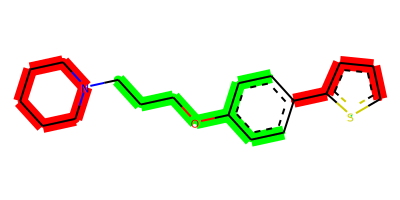

In [29]:
# fifth series
mol = MolFromSmiles("C(COC1=CC=C(C=C1)C1=CC=CS1)CN1CCCCC1") # blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[4.99784358]


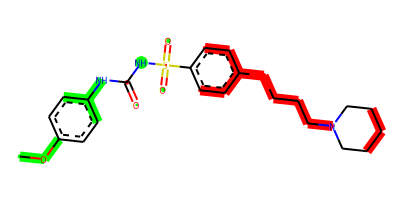

In [30]:
mol = MolFromSmiles("COC1=CC=C(NC(=O)NS(=O)(=O)C2=CC=C(OCCCN3CCCCC3)C=C2)C=C1") # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.51478073]


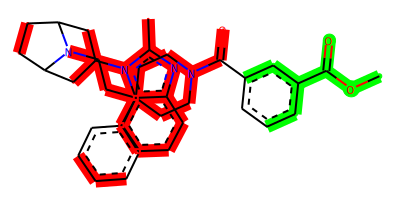

In [31]:
# sixth series
mol = MolFromSmiles("COC(=O)C1=CC=CC(=C1)C(=O)N1CCC(CCN2C3CCC2CC(C3)N2C(C)=NC3=C2C=CC=C3)(CC1)C1=CC=CC=C1") # blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[4.40589804]


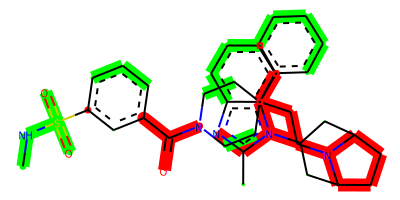

In [32]:
mol = MolFromSmiles("CNS(=O)(=O)C1=CC=CC(=C1)C(=O)N1CCC(CCN2C3CCC2CC(C3)N2C(C)=NC3=C2C=CC=C3)(CC1)C1=CC=CC=C1") # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.17745156]


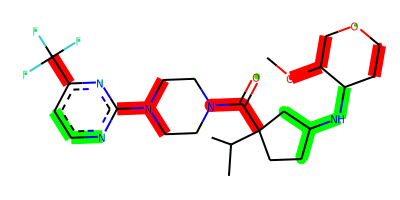

In [61]:
# seventh series
mol = MolFromSmiles('CO[C@@H]1COCC[C@@H]1N[C@@H]1CC[C@@](C(=O)N2CCN(c3nccc(C(F)(F)F)n3)CC2)(C(C)C)C1') # active
#Kekulize(mol)
herg_rf_pos, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

In [62]:
with open(os.path.join(EXAMPLE_PATH, "herg_rf_pos.svg"), "w+") as handle:
    handle.write(herg_rf_pos)

[3.42491435]


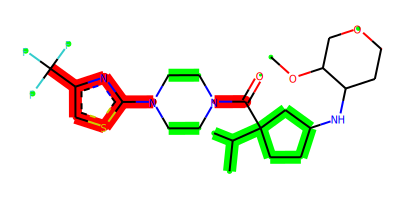

In [63]:
mol = MolFromSmiles('CO[C@@H]1COCC[C@@H]1N[C@@H]1CC[C@@](C(=O)N2CCN(c3nc(C(F)(F)F)cs3)CC2)(C(C)C)C1') # non-active
#Kekulize(mol)
herg_rf_neg, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

In [64]:
with open(os.path.join(EXAMPLE_PATH, "herg_rf_neg.svg"), "w+") as handle:
    handle.write(herg_rf_neg)

[5.43050866]


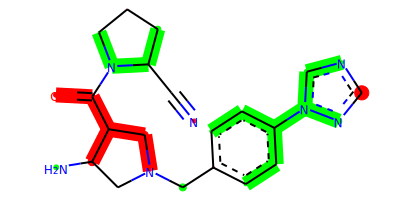

In [37]:
# eighth series
mol = MolFromSmiles('N#C[C@@H]1CCCN1C(=O)[C@@H]1CN(Cc2ccc(-n3cncn3)cc2)C[C@@H]1N')  # active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[4.35212609]


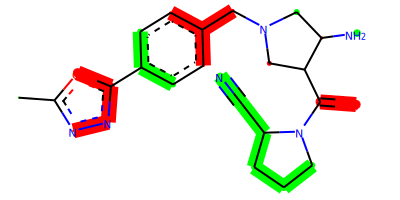

In [38]:
mol = MolFromSmiles('Cc1nnc(-c2ccc(CN3C[C@H](N)[C@H](C(=O)N4CCC[C@H]4C#N)C3)cc2)o1') # non-active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.51478073]


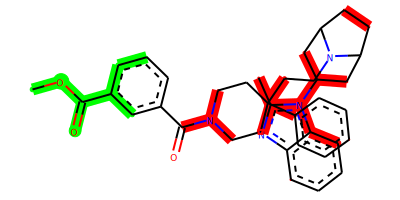

In [39]:
# ninth series
mol = MolFromSmiles('COC(=O)c1cccc(C(=O)N2CCC(CCN3C4CCC3CC(n3c(C)nc5ccccc53)C4)(c3ccccc3)CC2)c1') # blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.3,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[4.40589804]


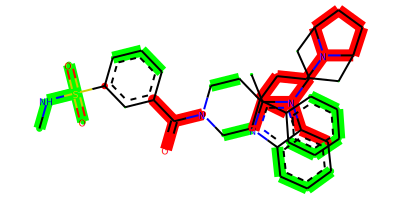

In [40]:
mol = MolFromSmiles('CNS(=O)(=O)c1cccc(C(=O)N2CCC(CCN3C4CCC3CC(n3c(C)nc5ccccc53)C4)(c3ccccc3)CC2)c1') # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.16036792]


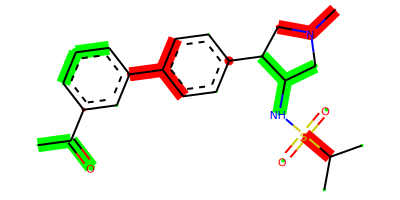

In [41]:
# tenth series
mol = MolFromSmiles('CC(=O)c1cccc(-c2ccc([C@H]3CN(C)C[C@@H]3NS(=O)(=O)C(C)C)cc2)c1') # active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.15851685]


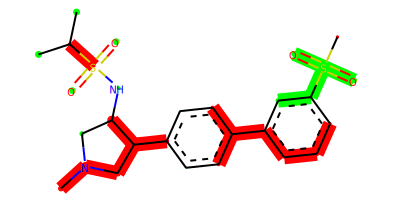

In [42]:
mol = MolFromSmiles('CC(C)S(=O)(=O)N[C@H]1CN(C)C[C@@H]1c1ccc(-c2cccc(S(C)(=O)=O)c2)cc1') # non-active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.36942086]


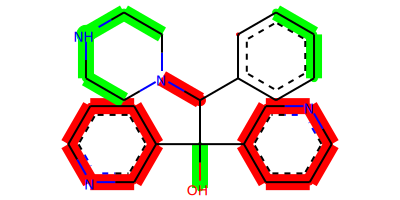

In [43]:
#11th series
mol = MolFromSmiles('OC(c1cccnc1)(c1cccnc1)C(c1ccccc1)N1CCNCC1') # active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.06876679]


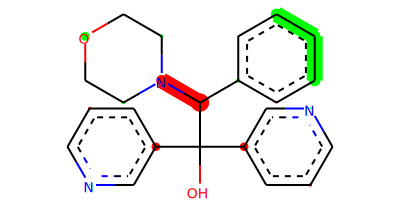

In [44]:
mol = MolFromSmiles('OC(c1cccnc1)(c1cccnc1)C(c1ccccc1)N1CCOCC1') # non-active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.20318498]


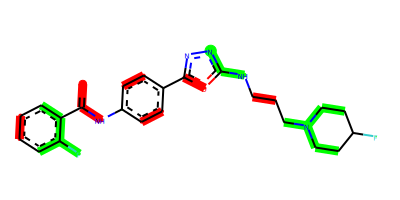

In [45]:
#12th series
mol = MolFromSmiles('O=C(Nc1ccc(-c2nnc(NCCCN3CCC(F)CC3)o2)cc1)c1ccccc1F') # active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[4.37046605]


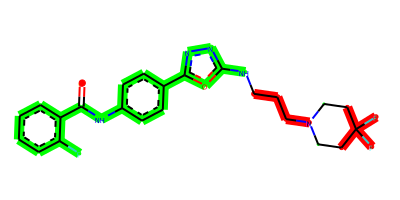

In [46]:
mol = MolFromSmiles('O=C(Nc1ccc(-c2nnc(NCCCN3CCC(F)(F)CC3)o2)cc1)c1ccccc1F') # non-active
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

### https://www.frontiersin.org/articles/10.3389/fphar.2018.01035/full

[6.07177031]


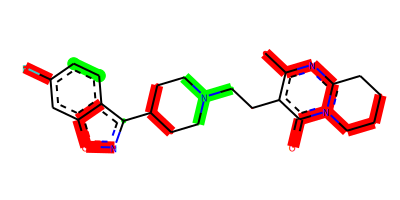

In [47]:
# first series 
mol = MolFromSmiles("CC1=C(CCN2CCC(CC2)C2=NOC3=CC(F)=CC=C23)C(=O)N2CCCCC2=N1") # blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img

[5.72527167]


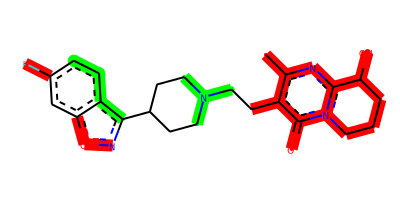

In [48]:
mol = MolFromSmiles("CC1=C(CCN2CCC(CC2)C2=NOC3=CC(F)=CC=C23)C(=O)N2CCCC(O)C2=N1") # non-blocker
_, img, _ = molecule_importance_diff(mol,
                                     model,
                                     vis_factor=0.1,
                                     eps=0.1,
                                     addHs=False)
print(pred_baseline(mol, model))
img